Q1. Theory and Concepts
i.Explain the concept of batch normalization in the context of Artificial Neural Networks
ii.Describe the benefits of using batch normalization during training
iii.Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.


Ans(i)
Batch Normalization (BN) is a technique used in Artificial Neural Networks (ANNs) to improve the training stability and convergence of deep neural networks. It was introduced by Sergey Ioffe and Christian Szegedy in their paper titled "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift."

Batch Normalization addresses the Internal Covariate Shift by normalizing the inputs of each layer across a mini-batch. It operates by normalizing the input to a layer with respect to the mean and standard deviation of that mini-batch. The normalized inputs are then scaled and shifted using learnable parameters, which are adjusted during training.

Batch Normalization can be applied to different types of layers in a neural network, including fully connected layers as well as convolutional layers. It is commonly used in conjunction with activation functions, and its application has become a standard practice in the training of deep neural networks.

Ans(ii)
1.Stability during Training: Batch Normalization reduces the impact of the vanishing/exploding gradient problem by normalizing the inputs, making it easier to train deeper networks.

2.Reduced Sensitivity to Initialization: BN reduces the dependence on the choice of initial weights, making it less sensitive to the initialization scheme.

3.Regularization Effect: Batch Normalization has a slight regularization effect, reducing the need for other regularization techniques like dropout.

4.Faster Convergence: Networks with BN often converge faster as the normalization helps maintain a stable distribution of inputs.

Ans(iii)
The working principle of Batch Normalization (BN) involves two main steps: normalization and the introduction of learnable parameters for scaling and shifting. Let's break down the process:

1. Normalization Step:
The normalization step in Batch Normalization involves transforming the inputs of a layer within a mini-batch to have a standardized distribution. This is achieved through the following sub-steps:
a. Compute Mean and Variance:

b. Normalize the Inputs:

2. Learnable Parameters:
Batch Normalization introduces two learnable parameters for each feature in the layer: scale (γ) and shift (β). These parameters allow the network to adapt and fine-tune the normalization process during training. The output of the Batch Normalization layer for each feature is computed as follows:
y(i)=γx(cap)i+β

Where:

γ (scale) is a learnable parameter that allows the network to adjust the scaling of the normalized values.
β (shift) is a learnable parameter that allows the network to adjust the centering (shifting) of the normalized values.
These parameters are updated through backpropagation during training, and they play a crucial role in allowing the network to recover the representation capacity it might lose during the normalization step.

Q2. Implementation

i.Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it

ii.Implement a simple feedforward neural network using any deep learning framework/library (e.g.,TensorFlow, PyTorch)

iii.Train the neural network on the chosen dataset without using batch normalization

iv.Implement batch normalization layers in the neural network and train the model again

v.Compare the training and validation performance (e.g., accuracy, loss) between the models with and
without batch normalization

vi.Discuss the impact of batch normalization on the training process and the performance of the neural
network.

i.import MNIST dataset and peprocess it

In [28]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [29]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__name__}")

Tensorflow Version 2.13.0
Keras Version keras.api._v2.keras


In [30]:
# checking for availability of GPU and CPU
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [31]:
# Loading MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [32]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [33]:
X_train.shape

(55000, 28, 28)

It shows training data contains 10000 recordes with each record can be represnted using 28X28 metrix

In [34]:
X_valid.shape

(5000, 28, 28)

It shows validation data contains 5000 record with each 28X28 metrix

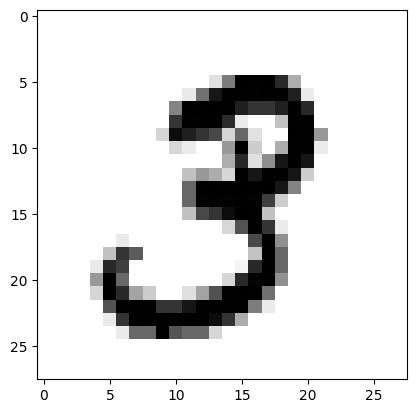

In [35]:
# Lets view some data
plt.imshow(X_train[1], cmap="binary")
plt.show()

<Axes: >

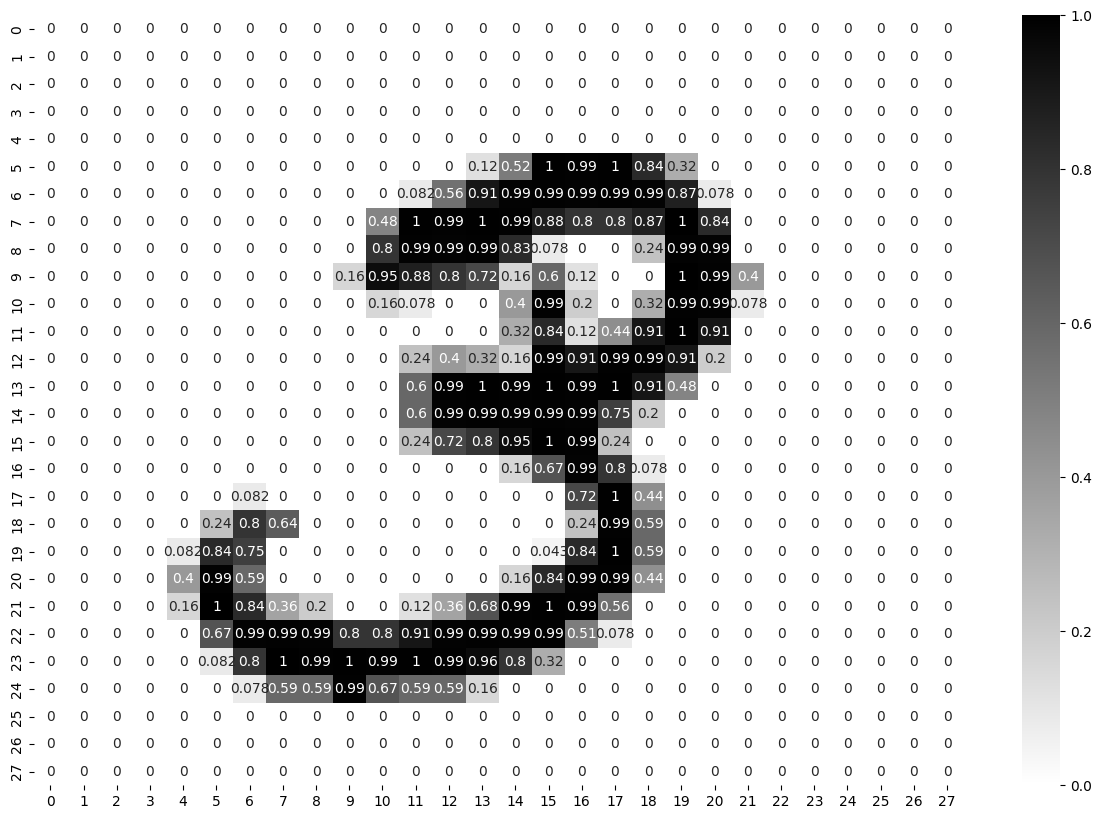

In [36]:
# ploting heatmap for some data
plt.figure(figsize=(15,10))
sns.heatmap(X_train[1], annot=True, cmap="binary")

ii.Implementing simple feed forward neural network using tensorflow

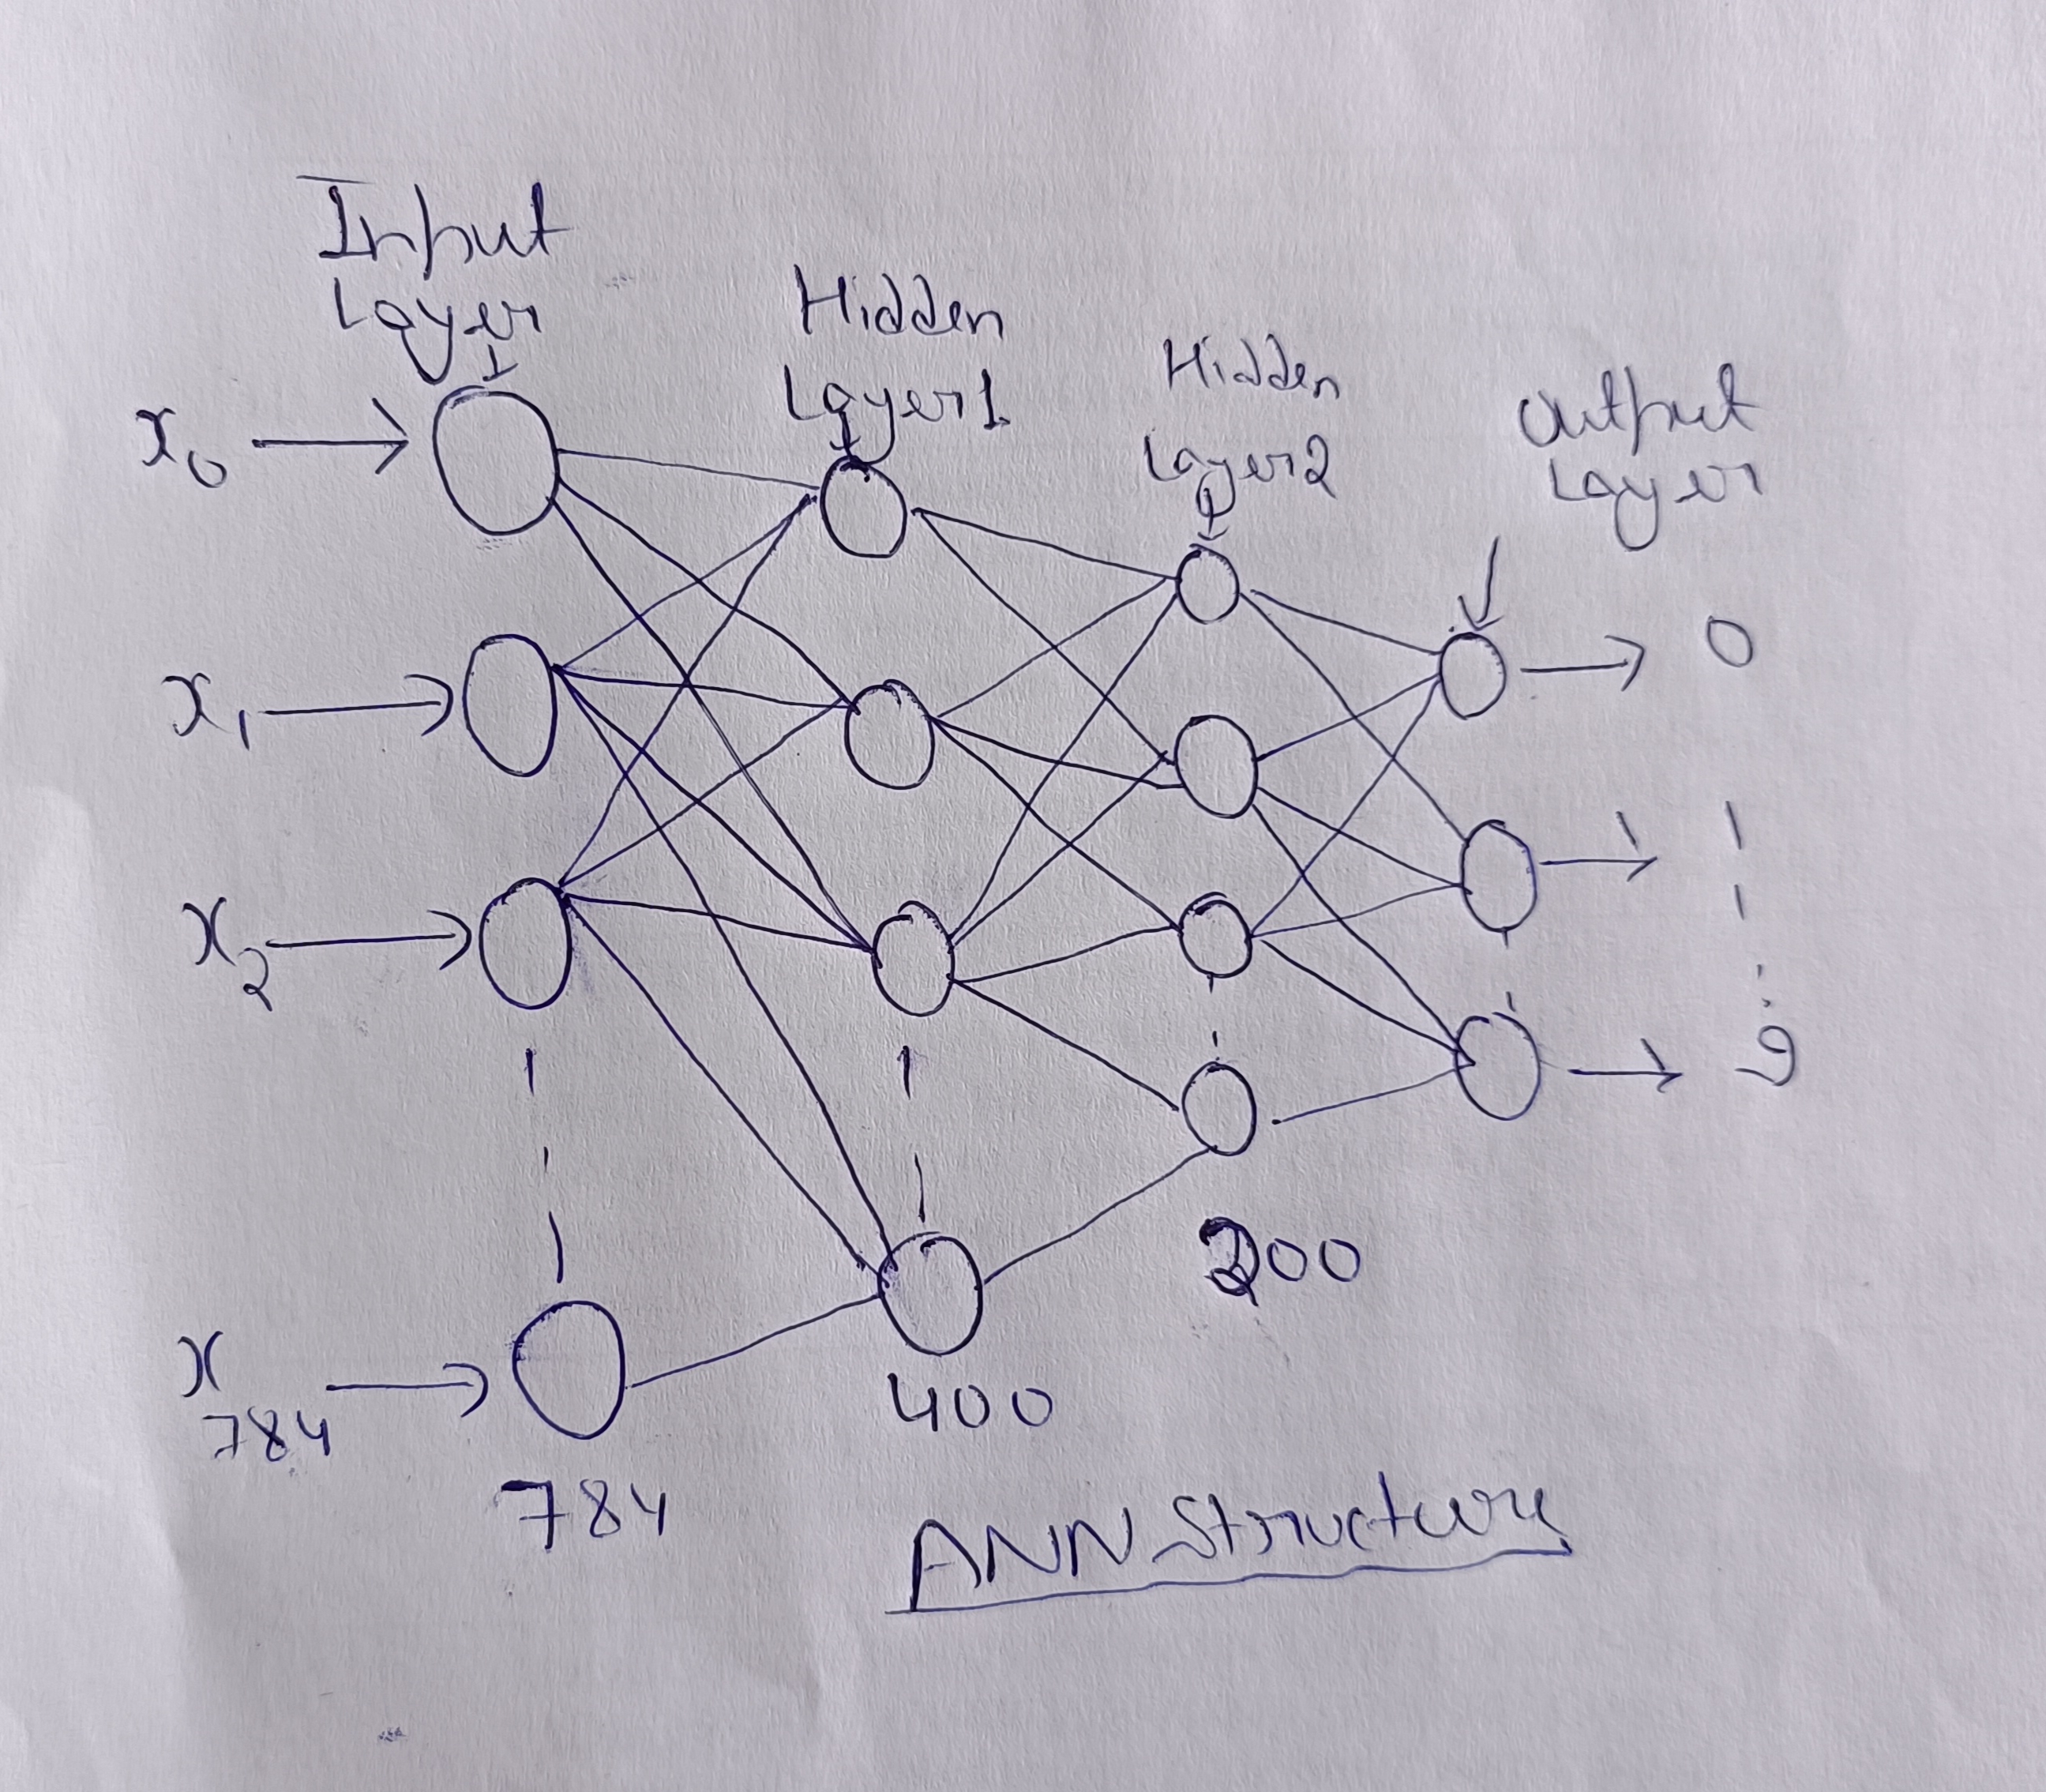

[img link](https://github.com/Shubham36842/Assigment21/blob/main/ANN%20structure%20.jpg)

In [37]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(400, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [38]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 400)               314000    
                                                                 
 hiddenLayer2 (Dense)        (None, 200)               80200     
                                                                 
 outputLayer (Dense)         (None, 10)                2010      
                                                                 
Total params: 396210 (1.51 MB)
Trainable params: 396210 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Compling model and defining hyperparameters
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


iii. Training model without Batch Normalistaion

In [40]:
# training
Epoch=20
VALIDATION_SET = (X_valid, y_valid)

history1 = model_clf.fit(X_train, y_train, epochs=Epoch,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6043 - accuracy: 0.8462 - val_loss: 0.3117 - val_accuracy: 0.9110
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2869 - accuracy: 0.9187 - val_loss: 0.2384 - val_accuracy: 0.9310
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2355 - accuracy: 0.9337 - val_loss: 0.2039 - val_accuracy: 0.9420
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2009 - accuracy: 0.9431 - val_loss: 0.1803 - val_accuracy: 0.9514
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1746 - accuracy: 0.9502 - val_loss: 0.1634 - val_accuracy: 0.9562
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1537 - accuracy: 0.9566 - val_loss: 0.1429 - val_accuracy: 0.9602
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1369 - accuracy: 0.9614 - val_loss: 0.1327 - val_accuracy:

In [41]:
history1.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [42]:
# creating dataframe for the data obtained after training
Dataframe1=pd.DataFrame(history1.history)
Dataframe1

,loss,accuracy,val_loss,val_accuracy
0,0.604282,0.846200,0.311684,0.9110
1,0.286910,0.918655,0.238418,0.9310
2,0.235495,0.933691,0.203861,0.9420
3,0.200866,0.943109,0.180320,0.9514
4,0.174573,0.950200,0.163366,0.9562
5,0.153695,0.956564,0.142946,0.9602
6,0.136895,0.961418,0.132711,0.9634
7,0.123050,0.965382,0.123139,0.9676
8,0.111407,0.969000,0.113430,0.9696
9,0.101549,0.971036,0.108982,0.9698


In [44]:
# evaluating model
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0848 - accuracy: 0.9733


[0.08477065712213516, 0.9732999801635742]

In [45]:
# predicting the items
x_new = X_test[2:5]
actual1 = y_test[2:5]
y_prob = model_clf.predict(x_new)
y_prob.round(3)
y_pred1 = np.argmax(y_prob, axis = -1)


1/1 [==============================] - 0s 50ms/step


In [46]:
# predicted values
y_pred1

array([1, 0, 4])

In [47]:
# actual values
actual1

array([1, 0, 4], dtype=uint8)

iv.Implementing Batch Normalisation and training data

In [51]:
# Loading MNIST dataset
mnist1 = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist1.load_data()

In [52]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

In [53]:
# Creating layers of ANN with
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(400, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]
model_batch = tf.keras.models.Sequential(LAYERS)

In [54]:
# Compling model and defining hyperparameters
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_batch.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [55]:
# training model

EPOCHS = 20
VALIDATION_SET = (X_valid, y_valid)

history2 = model_batch.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3235 - accuracy: 0.9015 - val_loss: 0.1630 - val_accuracy: 0.9498
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1592 - accuracy: 0.9525 - val_loss: 0.1292 - val_accuracy: 0.9620
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1204 - accuracy: 0.9631 - val_loss: 0.1145 - val_accuracy: 0.9654
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0954 - accuracy: 0.9719 - val_loss: 0.1061 - val_accuracy: 0.9688
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0785 - accuracy: 0.9767 - val_loss: 0.1017 - val_accuracy: 0.9678
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0666 - accuracy: 0.9808 - val_loss: 0.0963 - val_accuracy: 0.9718
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0586 - accuracy: 0.9828 - val_loss: 0.0950 - val_accurac

In [56]:
history2.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [58]:
# creating dataframe for the data obtained after training
pd.DataFrame(history2.history)

,loss,accuracy,val_loss,val_accuracy
0,0.323536,0.901509,0.162967,0.9498
1,0.159175,0.952473,0.129202,0.9620
2,0.120411,0.963145,0.114457,0.9654
3,0.095444,0.971891,0.106113,0.9688
4,0.078541,0.976655,0.101700,0.9678
5,0.066589,0.980782,0.096336,0.9718
6,0.058614,0.982818,0.095038,0.9706
7,0.050756,0.985309,0.092669,0.9718
8,0.045334,0.986473,0.091468,0.9724
9,0.038453,0.989273,0.089395,0.9730


In [59]:
# predicting the items
x_new = X_test[:5]
actual2 = y_test[:5]
y_prob = model_clf.predict(x_new)
y_prob.round(5)
y_pred2 = np.argmax(y_prob, axis = -1)

1/1 [==============================] - 0s 20ms/step


In [60]:
# predicted values
y_pred2

array([7, 2, 1, 0, 4])

In [61]:
# actual valves
actual2

array([7, 2, 1, 0, 4], dtype=uint8)

v.Comparision between training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization

<Axes: >

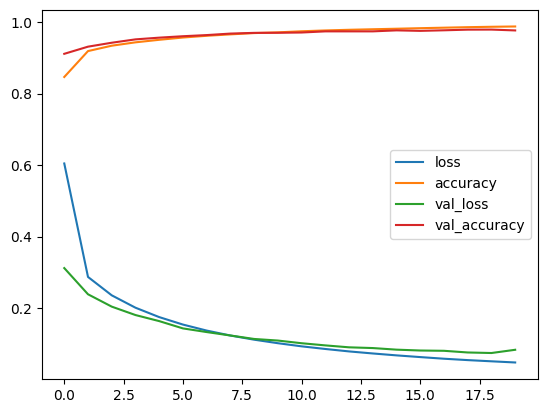

In [62]:
# for without batch normalisation
# creating a plot of parameters obtained
Dataframe1=pd.DataFrame(history1.history).plot()
Dataframe1

The plot shows after some epoches training Accuracy and Validation Accuracy get stablised and almost equal .

Inittial training loss is more the reduced with respect to validation loss



<Axes: >

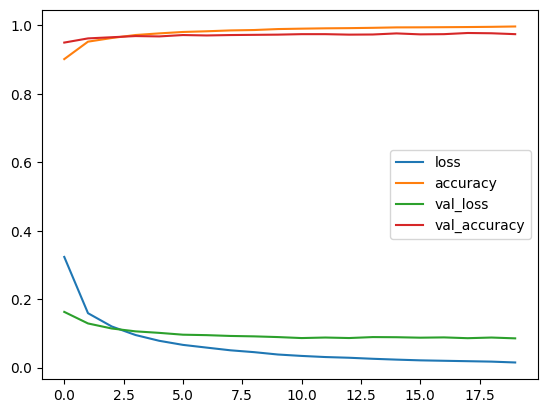

In [63]:
# for batch model
# creating a plot of parameters obtained
Dataframe2=pd.DataFrame(history2.history).plot()
Dataframe2

The plost shows that training accuracy and validation accuracy initally changes more than become less variating.

Intial training loss shows more variation than validation loss



vi.The impact of batch normalization on the training process and the performance of the neural network.


*  In the batch Normalisation the model get faster convergence .

*  model training accuracy get increased.

*  Final loss is less in batch normalisation





Q3. Experimentation and Analysis

1.Experiment with different batch sizes and observe the effect on the training dynamics and model performance

2.Discuss the advantages and potential limitations of batch normalization in improving the training of
neural networks.

In [87]:
# Loading MNIST dataset
mnist2 = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist2.load_data()

In [88]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

In [89]:
# Creating layers of ANN with
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(400, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]
model_batch1 = tf.keras.models.Sequential(LAYERS)

In [90]:
# Compling model and defining hyperparameters
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_batch1.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [75]:
# training model

EPOCHS = 20
VALIDATION_SET = (X_valid, y_valid)

history3 = model_batch1.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=40)

Epoch 1/20
1375/1375 [==============================] - 8s 5ms/step - loss: 0.3332 - accuracy: 0.8991 - val_loss: 0.1823 - val_accuracy: 0.9476
Epoch 2/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.1651 - accuracy: 0.9513 - val_loss: 0.1426 - val_accuracy: 0.9566
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.1244 - accuracy: 0.9635 - val_loss: 0.1262 - val_accuracy: 0.9628
Epoch 4/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.1022 - accuracy: 0.9700 - val_loss: 0.1164 - val_accuracy: 0.9678
Epoch 5/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.0836 - accuracy: 0.9756 - val_loss: 0.1110 - val_accuracy: 0.9694
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.0712 - accuracy: 0.9793 - val_loss: 0.1094 - val_accuracy: 0.9688
Epoch 7/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.0616 - accuracy: 0.9822 - val_loss: 0.1050 - val_accuracy:

In [91]:
# training model

EPOCHS = 20
VALIDATION_SET = (X_valid, y_valid)

history4 = model_batch1.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=100)

Epoch 1/20
550/550 [==============================] - 4s 5ms/step - loss: 0.4574 - accuracy: 0.8626 - val_loss: 0.2316 - val_accuracy: 0.9348
Epoch 2/20
550/550 [==============================] - 3s 5ms/step - loss: 0.2193 - accuracy: 0.9371 - val_loss: 0.1892 - val_accuracy: 0.9454
Epoch 3/20
550/550 [==============================] - 2s 4ms/step - loss: 0.1720 - accuracy: 0.9505 - val_loss: 0.1631 - val_accuracy: 0.9536
Epoch 4/20
550/550 [==============================] - 2s 4ms/step - loss: 0.1447 - accuracy: 0.9587 - val_loss: 0.1491 - val_accuracy: 0.9584
Epoch 5/20
550/550 [==============================] - 2s 4ms/step - loss: 0.1248 - accuracy: 0.9646 - val_loss: 0.1369 - val_accuracy: 0.9606
Epoch 6/20
550/550 [==============================] - 3s 5ms/step - loss: 0.1096 - accuracy: 0.9690 - val_loss: 0.1288 - val_accuracy: 0.9626
Epoch 7/20
550/550 [==============================] - 3s 5ms/step - loss: 0.0982 - accuracy: 0.9722 - val_loss: 0.1236 - val_accuracy: 0.9648
Epoch 

In [76]:
# creating dataframe for the data obtained after training
pd.DataFrame(history3.history)

,loss,accuracy,val_loss,val_accuracy
0,0.333155,0.899073,0.182336,0.9476
1,0.165076,0.951273,0.142598,0.9566
2,0.124351,0.963455,0.126151,0.9628
3,0.102243,0.969982,0.116357,0.9678
4,0.083577,0.975636,0.111011,0.9694
5,0.071183,0.979273,0.109361,0.9688
6,0.061578,0.982164,0.104969,0.9716
7,0.053429,0.985000,0.103191,0.9724
8,0.046039,0.986891,0.102563,0.9710
9,0.041051,0.988600,0.100921,0.9728


In [92]:
# creating dataframe for the data obtained after training
pd.DataFrame(history4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.457433,0.862564,0.231599,0.9348
1,0.219264,0.937127,0.189193,0.9454
2,0.171955,0.950491,0.163095,0.9536
3,0.144660,0.958709,0.149079,0.9584
4,0.124827,0.964582,0.136940,0.9606
5,0.109558,0.969018,0.128831,0.9626
6,0.098160,0.972218,0.123611,0.9648
7,0.087464,0.975509,0.118493,0.9658
8,0.078521,0.978382,0.113226,0.9670
9,0.073109,0.980018,0.110858,0.9674


<Axes: >

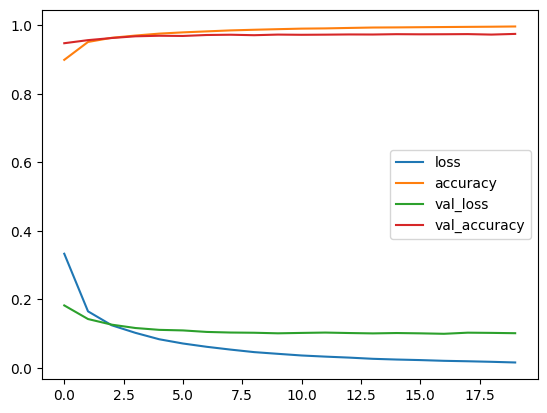

In [85]:
# for batch model with batch size 40
# creating a plot of parameters obtained
Dataframe3=pd.DataFrame(history3.history).plot()
Dataframe3

<Axes: >

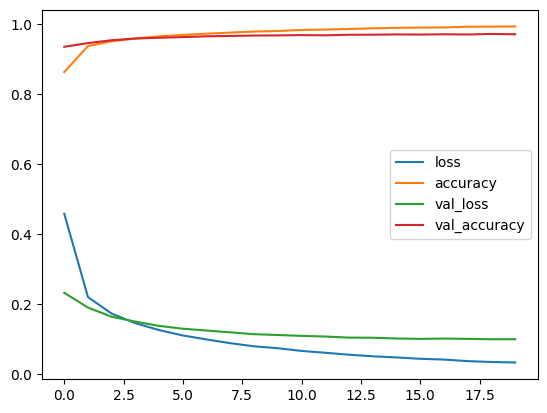

In [93]:
# for batch model with batch size 50
# creating a plot of parameters obtained
Dataframe4=pd.DataFrame(history4.history).plot()
Dataframe4

on inreasing batch size initial loss is become more initial accuracy also become less

Advantages:

1.Stabilizes Training:

BN normalizes the inputs to a layer by adjusting and scaling them during training. This helps in mitigating the vanishing/exploding gradient problems and stabilizes the training process.

2.Faster Convergence:

By normalizing activations, BN reduces the number of training iterations required for convergence. Networks with BN often converge faster, enabling faster model development.

3.Higher Learning Rates:

BN allows the use of higher learning rates. The normalization of inputs helps in preventing large updates that can lead to divergence. This, in turn, accelerates the learning process.

4.Reduces Sensitivity to Weight Initialization:

BN reduces the sensitivity of neural networks to weight initialization. This is particularly useful when dealing with deep networks, where initializing weights can be challenging.

5.Acts as Regularization:

BN has a slight regularizing effect, similar to dropout. This can reduce the need for dropout or other regularization techniques, making the training process more straightforward.

6.Improved Generalization:

Batch normalization tends to improve the generalization of the model to unseen data. It helps in training models that generalize well to both the training and validation sets.

Potential Limitations:

1.Batch Size Dependency:

BN relies on statistics computed over mini-batches, and it can be sensitive to the choice of batch size. In some cases, very small batch sizes may lead to inaccurate estimates of mean and variance, impacting the normalization process.

2.Inference Overhead:

During inference, the normalization statistics need to be computed based on the entire dataset or a representative subset. This introduces additional computation overhead during inference, which might be undesirable in certain real-time applications.

3.Not Suitable for Certain Architectures:

BN may not work well with recurrent neural networks (RNNs) because the concept of mini-batches is not as straightforward in sequences. Variants like Layer Normalization or Instance Normalization are often preferred in RNNs.

4.Impact on Small Datasets:

For very small datasets, the running mean and variance may not accurately represent the entire data distribution. In such cases, BN might not provide significant benefits.

5.Unclear Role in Generative Models:

The role of batch normalization in generative models like GANs (Generative Adversarial Networks) is still an area of research. Its application in the generator and discriminator networks may have different effects.

6.Dependency on Initialization:

Although BN reduces sensitivity to weight initialization to some extent, it doesn't eliminate the importance of proper initialization altogether. It might still be necessary to choose suitable initialization strategies.